In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2, whiten

pd.set_option('display.max_columns', None)

In [29]:
stations = pd.read_csv("alt_fuel_stations.csv")

In [30]:
coords = stations.loc[:,['Station Name','Latitude','Longitude']]
coords.head()

,Station Name,Latitude,Longitude
0,PG&E - Grass Valley Service Center,39.200620,-121.062126
1,United Parcel Service,37.773172,-121.968239
2,PG&E - Santa Cruz Service Center,36.969267,-121.999295
3,PG&E - Bakersfield Service Center,35.317617,-119.039048
4,PG&E - Fresno Service Center,36.721360,-119.761165


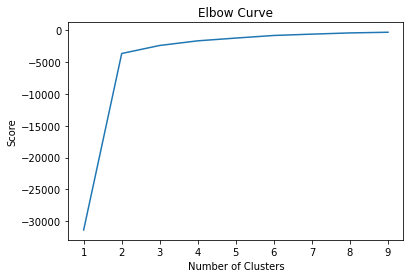

In [34]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = coords[['Latitude']]
X_axis = coords[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [38]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(coords[coords.columns[1:3]]) # Compute k-means clustering.
coords['cluster_label'] = kmeans.fit_predict(coords[coords.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(coords[coords.columns[1:3]]) # Labels of each point
coords.head(10)

,Station Name,Latitude,Longitude,cluster_label
0,PG&E - Grass Valley Service Center,39.200620,-121.062126,0
1,United Parcel Service,37.773172,-121.968239,0
2,PG&E - Santa Cruz Service Center,36.969267,-121.999295,0
3,PG&E - Bakersfield Service Center,35.317617,-119.039048,1
4,PG&E - Fresno Service Center,36.721360,-119.761165,0
5,PG&E - Salinas Service Center,36.672170,-121.641106,0
6,PG&E - San Carlos Service Center,37.516892,-122.262465,0
7,PG&E - San Francisco Service Center,37.761127,-122.413830,0
8,PG&E - Concord Service Center,37.956072,-122.028697,0
9,PG&E - Hayward Service Center,37.642339,-122.117821,0


In [48]:
ruh_m = plt.imread('CA.png')

BBox = ((coords.Longitude.min(),coords.Longitude.max(),      
         coords.Latitude.min(), coords.Latitude.max()))
BBox



(-124.265826, -65.9736328125, 18.3753128051758, 41.997506)

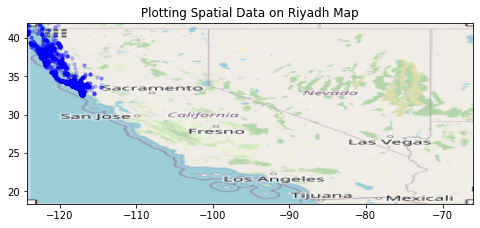

In [47]:


fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(coords.Longitude, coords.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')